In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import speed_of_light as c

C:\Users\Davide\AppData\Local\Temp\ipykernel_18428\281990964.py:18: RuntimeWarning: divide by zero encountered in divide
  xi = 1j/(R*(G[n]-G))*(1-np.exp(-1j*(G[n]-G)*a))*(1/eps2 - 1/eps1)
C:\Users\Davide\AppData\Local\Temp\ipykernel_18428\281990964.py:18: RuntimeWarning: invalid value encountered in divide
  xi = 1j/(R*(G[n]-G))*(1-np.exp(-1j*(G[n]-G)*a))*(1/eps2 - 1/eps1)
C:\Users\Davide\AppData\Local\Temp\ipykernel_18428\281990964.py:18: RuntimeWarning: invalid value encountered in multiply
  xi = 1j/(R*(G[n]-G))*(1-np.exp(-1j*(G[n]-G)*a))*(1/eps2 - 1/eps1)


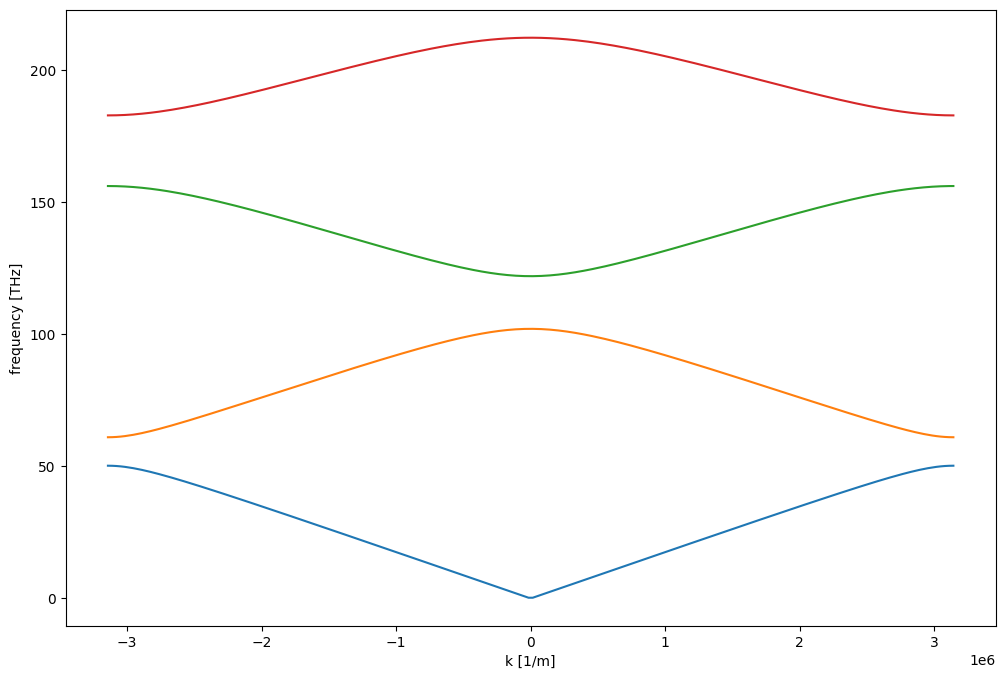

In [87]:
eps1 = 1
eps2 = 9
R = 1e-6
a = R/5

Nk = 200
ks = np.linspace(-np.pi/R, np.pi/R, Nk)
N = 50

G = 2*np.pi/R*np.arange(-N, N+1)

xi = np.zeros(2*N+1, dtype = 'complex')

theta = np.zeros((2*N+1, 2*N+1), dtype = 'complex')
omegas = np.zeros((Nk, 2*N+1), dtype="complex")
for i, k in enumerate(ks): 
    for n in np.arange(0, 2*N+1):  
        xi = 1j/(R*(G[n]-G))*(1-np.exp(-1j*(G[n]-G)*a))*(1/eps2 - 1/eps1)  
        xi[np.where(G[n] == G)] = a/R*(1/eps1 - 1/eps2) + 1/eps2   
        theta[n] = xi*(G[n]+k)*(G+k)
    omega = np.sqrt(np.real(np.sort(np.linalg.eigvals(theta))))*c
    omegas[i] = omega

fig, ax = plt.subplots(figsize = (12,8))

ax.plot(ks, omegas[:, :4]*1e-12/(2*np.pi))
ax.set_ylabel("frequency [THz]")
ax.set_xlabel("k [1/m]")
plt.show()
